In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1990 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/1990data_final.csv")
data2000 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2000data_final.csv")
data2010 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2010data_final.csv")
data2019 = pd.read_csv("https://hyd123.s3.us-east-2.amazonaws.com/updated_data/2019data_final.csv")#("https://hyd123.s3.us-east-2.amazonaws.com/2019data_redo.csv")

In [8]:
data1990 = pd.read_csv("Resources/1990data_redo.csv")
data2000 = pd.read_csv("Resources/2000data_redo.csv")
data2010 = pd.read_csv("Resources/2010data_redo.csv")
data2019 = pd.read_csv("Resources/2019data_redo.csv")

In [3]:
data1990['year'] = 0
data2000['year'] = 1
data2010['year'] = 2
data2019['year'] = 3
data1990.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,year
0,0,0.7360,https://api.spotify.com/v1/audio-analysis/1NCu...,0.780,322133,0.565,1NCuYqMc8hKMb4cpNTcJbD,0.002690,3,0.0630,-7.320,0,0.0306,101.967,4,https://api.spotify.com/v1/tracks/1NCuYqMc8hKM...,audio_features,spotify:track:1NCuYqMc8hKMb4cpNTcJbD,0.365,0
1,1,0.0561,https://api.spotify.com/v1/audio-analysis/51q3...,0.631,330933,0.935,51q3nDYWAqPY4hlgKEbP6j,0.152000,1,0.6340,-8.340,0,0.0587,109.122,4,https://api.spotify.com/v1/tracks/51q3nDYWAqPY...,audio_features,spotify:track:51q3nDYWAqPY4hlgKEbP6j,0.678,0
2,2,0.6570,https://api.spotify.com/v1/audio-analysis/5z3Z...,0.401,211973,0.285,5z3ZDMP02xF33yCvPFnct3,0.000011,11,0.1580,-11.005,1,0.0327,130.465,4,https://api.spotify.com/v1/tracks/5z3ZDMP02xF3...,audio_features,spotify:track:5z3ZDMP02xF33yCvPFnct3,0.267,0
3,3,0.0287,https://api.spotify.com/v1/audio-analysis/0UAE...,0.862,215040,0.918,0UAEHlFR79k9CJvknSGUNf,0.000001,10,0.0492,-7.325,0,0.1080,124.811,4,https://api.spotify.com/v1/tracks/0UAEHlFR79k9...,audio_features,spotify:track:0UAEHlFR79k9CJvknSGUNf,0.651,0
4,4,0.3340,https://api.spotify.com/v1/audio-analysis/1s12...,0.713,274093,0.432,1s12gYsPeTNQ6znow46nmp,0.000299,11,0.0674,-12.639,0,0.0300,118.955,4,https://api.spotify.com/v1/tracks/1s12gYsPeTNQ...,audio_features,spotify:track:1s12gYsPeTNQ6znow46nmp,0.445,0


In [4]:
df = pd.concat([data1990, data2000,data2010,data2019], ignore_index=True,sort=False)

In [5]:
df = df[['year','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
df = df.dropna(how = 'any')
df.tail()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4667,3,0.0794,0.816,136366,0.582,0.000006,8,0.0916,-4.141,1,0.341,160.004,4,0.542
4668,3,0.3630,0.630,174333,0.671,0.000000,6,0.1130,-6.659,0,0.256,89.921,4,0.333
4669,3,0.5820,0.819,268893,0.458,0.173000,4,0.1280,-10.223,0,0.167,122.981,4,0.232
4670,3,0.1190,0.400,186107,0.795,0.000000,10,0.1590,-3.731,0,0.461,190.097,4,0.702
4671,3,0.3900,0.853,221543,0.351,0.000009,7,0.7520,-10.198,1,0.241,118.028,4,0.282


In [6]:
#df.loc[2365:2380,:]

In [7]:
X = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df["year"].values#.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)


Shape:  (4672, 13) (4672,)


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

/Users/yanhuanhuang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yanhuanhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yanhuanhuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Decision Tree Model

In [10]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [11]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)


0.8878424657534246

In [12]:
predictions = clf.predict(X_test_scaled)


In [13]:
test_result_df = pd.DataFrame({"Predicted": y_test, "Actual": predictions})[["Predicted", "Actual"]]
test_result_df

,Predicted,Actual
0,1,1
1,2,2
2,3,3
3,2,2
4,3,3
5,3,3
6,0,3
7,2,3
8,1,1
9,0,0


In [14]:
feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)


[(0.12429779468204764, 'duration_ms'),
 (0.11947504196197659, 'loudness'),
 (0.11597703453060722, 'acousticness'),
 (0.10258840763219759, 'energy'),
 (0.09208778236947505, 'tempo'),
 (0.08901399840177113, 'danceability'),
 (0.0808754946049873, 'valence'),
 (0.07891216857928333, 'speechiness'),
 (0.07807571646572273, 'liveness'),
 (0.06407315255578203, 'instrumentalness'),
 (0.04500781841334412, 'key'),
 (0.006792432776562986, 'mode'),
 (0.002823157026242268, 'time_signature')]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.91212 to fit



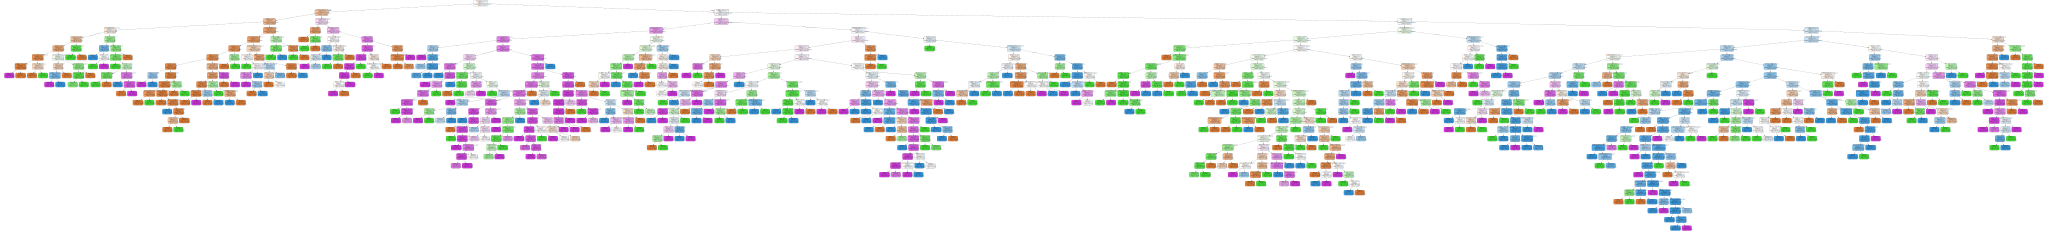

In [16]:
import graphviz
dot_data = tree.export_graphviz( clf, out_file=None, feature_names=feature_names, class_names=["1990","2000","2010","2019"], filled=True, rounded=True, special_characters=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('music.png')
graph = graphviz.Source(dot_data) 
graph


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=200) 
rf = rf.fit(X_train_scaled, y_train) 
rf.score(X_test_scaled, y_test)
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.124783935403968, 'duration_ms'),
 (0.12285209790467314, 'loudness'),
 (0.09632080010895092, 'energy'),
 (0.09198440751522265, 'speechiness'),
 (0.08849494707341848, 'valence'),
 (0.08747194565287432, 'tempo'),
 (0.08668254859095076, 'acousticness'),
 (0.08342223384926394, 'danceability'),
 (0.08271786691020827, 'liveness'),
 (0.06618094460422495, 'instrumentalness'),
 (0.05074415833211255, 'key'),
 (0.0136073681139339, 'mode'),
 (0.004736745940198093, 'time_signature')]

In [20]:
rf.score(X_test_scaled, y_test)

0.8921232876712328

### Neural Network

In [ ]:
from numpy.random import seed 
seed(42)

In [ ]:
from keras.utils import to_categorical
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential 
model_neural = Sequential()


In [ ]:
from tensorflow.keras.layers import Dense 
number_inputs = 13 
number_hidden_nodes = 100 
model_neural.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

for i in range(11):
    model_neural.add(Dense(units=number_hidden_nodes, activation='relu')) 

number_classes = 4 
model_neural.add(Dense(units=number_classes, activation='softmax'))
model_neural.summary()


In [ ]:
model_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_neural.fit( X_train_scaled, y_train_cate, epochs=20, shuffle=True, verbose=2 )
model_loss, model_accuracy = model_neural.evaluate( X_test_scaled, y_test_cate, verbose=2) 
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


### K Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = [] 
test_scores = []
for k in range(1, 20, 2):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train)  
      train_score = knn.score(X_train_scaled, y_train)
      test_score = knn.score(X_test_scaled, y_test) 
      train_scores.append(train_score) 
      test_scores.append(test_score)
      print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 0.963/0.878
k: 3, Train/Test Score: 0.899/0.774
k: 5, Train/Test Score: 0.814/0.688
k: 7, Train/Test Score: 0.738/0.630
k: 9, Train/Test Score: 0.682/0.586
k: 11, Train/Test Score: 0.649/0.571
k: 13, Train/Test Score: 0.627/0.548
k: 15, Train/Test Score: 0.609/0.536
k: 17, Train/Test Score: 0.595/0.533
k: 19, Train/Test Score: 0.587/0.521


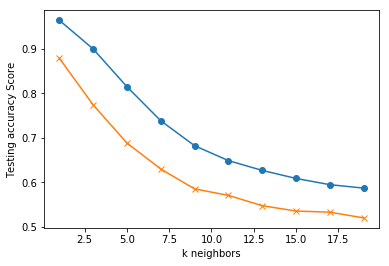

In [43]:
plt.plot(range(1, 20, 2), train_scores, marker='o') 
plt.plot(range(1, 20, 2), test_scores, marker="x") 
plt.xlabel("k neighbors") 
plt.ylabel("Testing accuracy Score")
plt.show()


In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) 
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=1 Test Acc: 0.878


### Gaussian Naive Bayes

In [9]:
#from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled, y_test)

0.413527397260274

### Support Vector Machine

In [30]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear') 
model_svc.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report
predictions = model_svc.predict(X_test_scaled)
print(classification_report(y_test, predictions, target_names=["1990", "2000","2010","2019"]))


              precision    recall  f1-score   support

        1990       0.59      0.47      0.52       315
        2000       0.38      0.32      0.35       282
        2010       0.41      0.52      0.45       289
        2019       0.55      0.61      0.58       282

   micro avg       0.48      0.48      0.48      1168
   macro avg       0.48      0.48      0.48      1168
weighted avg       0.48      0.48      0.48      1168



In [25]:
svm_predictions = model_svc.predict(X_test_scaled) 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[148,  69,  52,  46],
       [ 58,  89,  95,  40],
       [ 37,  45, 149,  58],
       [ 12,  28,  71, 171]], dtype=int64)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")


Training Data Score: 0.4748858447488584
Testing Data Score: 0.476027397260274


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
from sklearn.linear_model import LogisticRegressionCV 
classifier = LogisticRegressionCV(multi_class="multinomial")
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Training Data Score: 0.4694634703196347
Testing Data Score: 0.473458904109589


In [35]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.4674657534246575
Testing Data Score: 0.461472602739726
